Za pomocą funkcji: 

```python
sklearn.datasets.make_moons
```

wygenerujmy 4 zbiory danych z parametrami:

  * n_samples=1000, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3


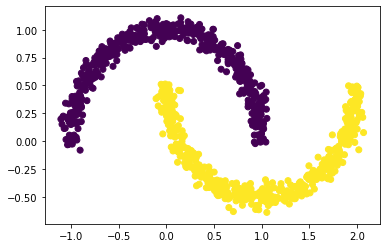

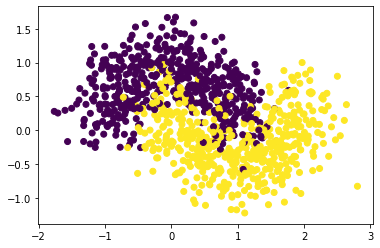

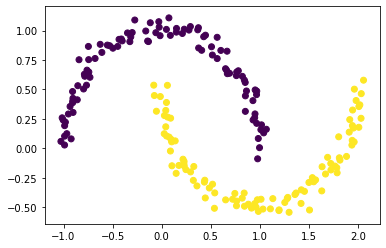

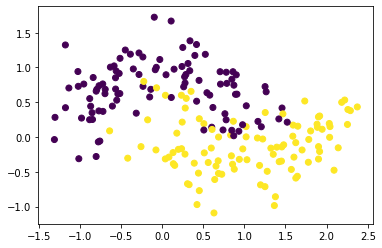

In [4]:
from sklearn.datasets import make_moons

A=make_moons(n_samples=1000, noise =.05)
B=make_moons(n_samples=1000, noise =.3)
C=make_moons(n_samples=200, noise =.05)
D=make_moons(n_samples=200, noise =.3)

import matplotlib.pyplot as plt

plt.scatter(A[0][:,0],A[0][:,1],c=A[1])
plt.show()
plt.scatter(B[0][:,0],B[0][:,1],c=B[1])
plt.show()
plt.scatter(C[0][:,0],C[0][:,1],c=C[1])
plt.show()
plt.scatter(D[0][:,0],D[0][:,1],c=D[1])
plt.show()

# Zadanie 1

Do równania prostej w postaci ogólnej:

$$
Ax + By + C = 0
$$

łatwo znaleźć współrzędne wektora prostopadłego do wykresu:

$$
v = [A,B].
$$

Łatwo policzyć, że dla funkcji:

$$
y = ax+b
$$

mamy

$$
A=-a, B=1, C=-b
$$

Dla danych z poprzedniego zadania narysuj dowolną prostą przechodzącą przez środek układu współrzędnych i dokonaj klasyfikacji.
Dane po lewej stronie mają być oznaczone jako -1, a prawej jako +1. Użyj iloczynu skalarnego oraz wektora normalnego do prostej.

Wykonaj rysunek na którym oprócz danych zaznaczona będzie linia podziału.

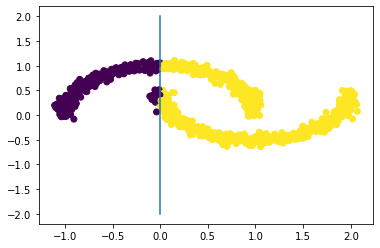

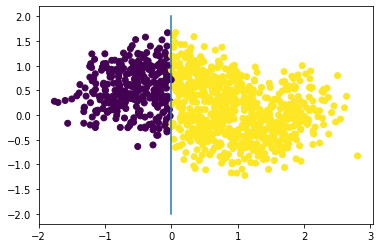

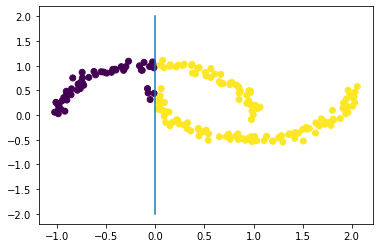

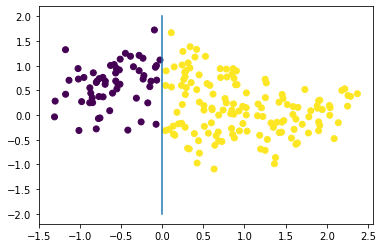

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

a = 1
b = 0

def draw(a, b):#funkcja rysujaca wykres prostej o rownaniu ax+by=0
    if(b==0):
        Y = np.linspace(-2,2,100)
        X = 0*Y
        plt.plot(X,Y)
    else:
        X = np.linspace(-2,2,100)
        Y = (-1)*(a/b)*X
        plt.plot(X,Y)
    return

def color(a, b, A):#rysuje wykres funkcji i koloruje punkty po jej dwoch stronach
    A_class = []
        
    v = np.array([[a],[b]])
    for x in A[0]:
        y = x.reshape(-1,1)
        s = np.dot(v.T,y)

        if(s[0][0]>=0):
            A_class.append(1)
        else:
            A_class.append(-1)
        
    plt.scatter(A[0][:,0],A[0][:,1],c=A_class)
    draw(a,b)
    plt.show()
    
    return


color(a,b,A)
color(a,b,B)
color(a,b,C)
color(a,b,D)


# Zadanie 2
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym dane i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

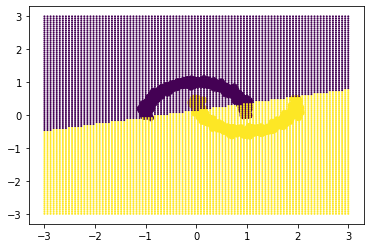

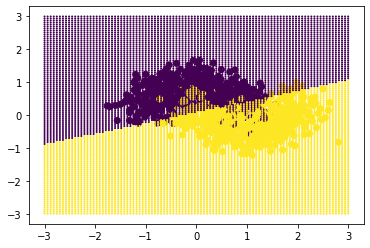

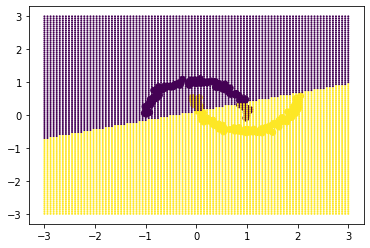

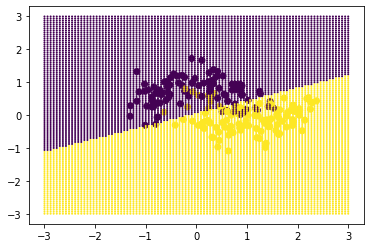

In [7]:
from itertools import product
N = 100
X = np.linspace(-3,3,N)
X2 = np.array([[x,y] for x in X for y in X])

def predykcja(A):
    model = LogisticRegression().fit(A[0],A[1])
    Y = model.predict(X2)
    plt.scatter(A[0][:,0],A[0][:,1], c=A[1])
    plt.scatter(X2[:,0],X2[:,1], s=1, c=Y)
    plt.show()
    
predykcja(A)
predykcja(B)
predykcja(C)
predykcja(D)

# Zadanie 3 
Dla danych iris (dwie wybrane współrzędne) wytrenuj logistyczną regresję i wykonaj rysunek jak poniżej (czyli z zaznaczonymi obszarami klasyfikacji).


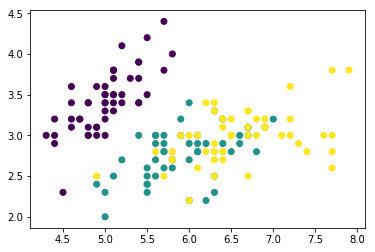

In [4]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

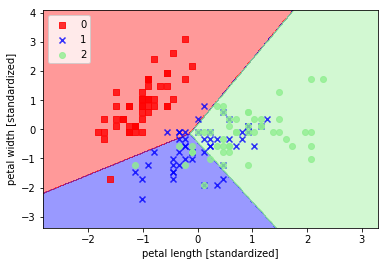

# Zadanie 4

Użyj sztucznych danych z poniższego przykładu, aby wykonać model regresji liniowej (który posłuże do bardzo naiwnej klasyfikacji) oraz regresji logistycznej. 
Dla każdego z modelów narysuj odpowiednią prostą (graniczną) ilustrującą działanie owego modelu.

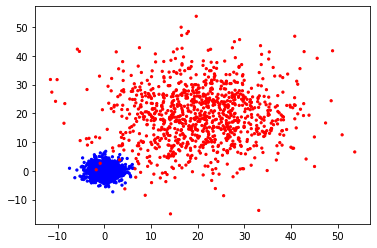

[0.02003761 0.01952349]
0.10575432785225924
[[0.75222088 0.69603531]]
[-5.98482272]


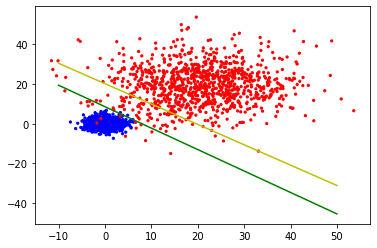

In [97]:
import numpy as np
import pandas as pd
N=1000

df1 = 2*pd.DataFrame(np.random.randn(N, 2), columns=['A', 'B'])
df2 = 20+10*pd.DataFrame(np.random.randn(N, 2), columns=['A', 'B'])
#print(df1.mean())
#print(df2.mean())

Data=df1.append(df2, ignore_index=True)
Data['C']=1
Data.loc[range(0,N),'C']=0

import matplotlib.pyplot as plt

s='b'*N+'r'*N
plt.scatter(Data['A'],Data['B'], s=5,alpha=1,c=list(s))
plt.show()

from sklearn.linear_model import LogisticRegression, LinearRegression

X = Data.to_numpy()[:,:2]
Y = Data.to_numpy()[:,2]

model_lin = LinearRegression().fit(X,Y)
print(model_lin.coef_)
print(model_lin.intercept_)

x = np.linspace(-10,50,100)
y = (0.5-model_lin.intercept_ - model_lin.coef_[0]*x)/model_lin.coef_[1]
plt.plot(x,y,'y')

model_log = LogisticRegression().fit(X,Y)
print(model_log.coef_)
print(model_log.intercept_)

y = (-model_log.intercept_ - model_log.coef_[0][0]*x)/model_log.coef_[0][1]
plt.plot(x,y,'g')

plt.scatter(Data['A'],Data['B'], s=5,alpha=1,c=list(s))
plt.show()

# Zadanie 5
Przedstaw tabele "True/False Positive/Negative" dla modeli wykonanych w poprzednim zadaniu. Oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$. Użyj 
```python
sklearn.metrics.confusion_matrix
```

In [113]:
import sklearn.metrics as metr

lin_pred = []
for i in model_lin.predict(X):
    if(i>=0.5):
        lin_pred.append(1)
    else:
        lin_pred.append(0)

log_pred = model_log.predict(X)
#TN FP
#FN TP
A_lin = metr.confusion_matrix(Y, lin_pred)
A_log = metr.confusion_matrix(Y, log_pred)
print("Model liniowy:") 
print(A_lin)
print("Model ligistyczny:")
print(A_log)

print("Czułość:")
print(metr.recall_score(Y, lin_pred))
print(metr.recall_score(Y, log_pred))

print("Swoistość:")
print(A_lin[0,0]/(A_lin[0,0]+A_lin[0,1]))
print(A_log[0,0]/(A_log[0,0]+A_log[0,1]))

print("Dodatnia wartość predykcyjna:")
print(metr.precision_score(Y,lin_pred))
print(metr.precision_score(Y,log_pred))

print("F_1:")
print(metr.f1_score(Y,lin_pred))
print(metr.f1_score(Y,log_pred))


Model liniowy:
[[1000    0]
 [  87  913]]
Model ligistyczny:
[[997   3]
 [ 16 984]]
Czułość:
0.913
0.984
Swoistość:
1.0
0.997
Dodatnia wartość predykcyjna:
1.0
0.9969604863221885
F_1:
0.9545216936748563
0.9904378459989935


# Zadanie 6

Dopasuj dwa modele regresji logistycznej na danych dotyczących irisów, który objaśnia rodzaj. Pierwszy model ma opierać się na trzech pierwszych zmiennych objaśniających (jak na rysunku), drugi ma mieć cztery zmienne objaśniające. Następnie przedstaw tabelę "True/False Positive/Negative" dla wykonanych modeli. Oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$. Porównaj modele. Dodatkowo narysuj płaszczyznę, będącą warunkiem brzegowym dla pierwszego modelu.

[[47  3]
 [ 3 47]]
Czułość: 0.94
Swoistość: 0.94
DWP: 0.94
F1: 0.94
[[47  3]
 [ 1 49]]
Czułość: 0.94
Swoistość: 0.94
DWP: 0.9791666666666666
F1: 0.9591836734693877


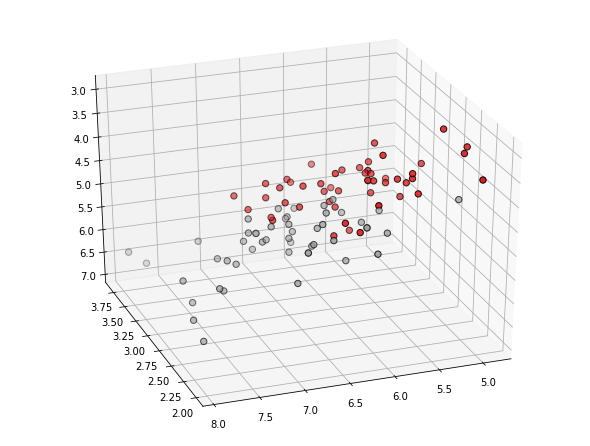

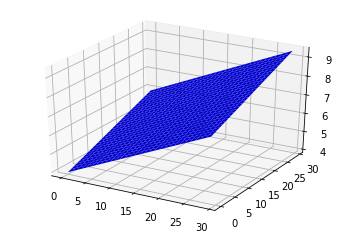

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()


X = iris.data[iris.target!=0]
y = iris.target[iris.target!=0]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
X1 = X[:,0:3]

model1 = LogisticRegression().fit(X1,y)
model2 = LogisticRegression().fit(X,y)

Y1 = model1.predict(X1)
Y2 = model2.predict(X)

def specificity_score(Y,Yp):
    A = confusion_matrix(Y,Yp)
    return A[0,0]/(A[0,0]+A[0,1])

def overall_score(Y,Yp):
    print(confusion_matrix(Y,Yp))
    print("Czułość:", recall_score(Y,Yp))
    print("Swoistość:", specificity_score(Y,Yp))
    print("DWP:", precision_score(Y,Yp))
    print("F1:", f1_score(Y,Yp))
    return

overall_score(y,Y1)
overall_score(y,Y2)

normal = model1.coef_.T
#print(normal)
d = model1.intercept_

xx, yy = np.meshgrid(range(30), range(30))

z = (-normal[0]*xx - normal[1]*yy - d)*1./normal[2]
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx,yy,z, color='blue')
plt.show()

# Zadanie 7

Bazując na poniższych danych dobierz model regresji logistycznej, gdzie zmienną objaśnianą jest kolumna D. Następnie przedstaw tabelę "True/False Positive/Negative" dla wykonanych modeli. Oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$.
Następnie dodaj do zmiennych objaśniających kwadrat pierwszej kolumny. Ponownie oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$.

Zilustruj obie regresje odpowiednią płaszczyzną oraz odpowiednią powierzchnią.

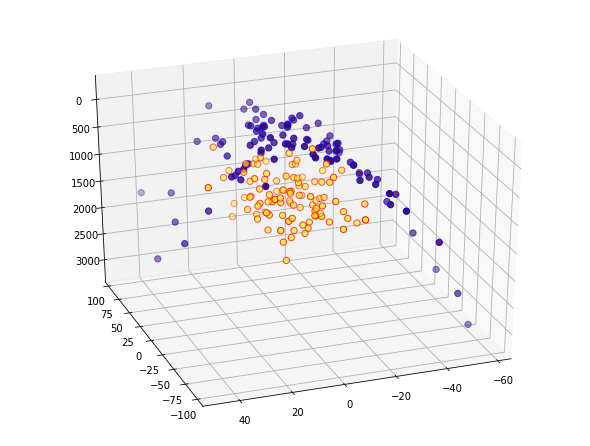

[[ 6.60621240e+00  1.71902040e+01  1.82629094e+02  0.00000000e+00]
 [ 7.62515911e-01  4.26682376e+01  1.98008232e+01  0.00000000e+00]
 [-3.19108992e+01 -3.35798623e+01  1.09367436e+03  0.00000000e+00]
 [-2.25710238e+01 -4.40735856e+01  4.98546425e+02  0.00000000e+00]
 [ 1.35267598e+01  8.87427568e+01  1.89343444e+02  0.00000000e+00]
 [ 1.62422080e+01 -7.25000262e+00  3.62337567e+02  0.00000000e+00]
 [ 7.88642079e-01  2.65845540e+01 -1.35524974e+01  0.00000000e+00]
 [-2.31414915e+01  1.47530784e+01  6.01270719e+02  0.00000000e+00]
 [-4.93397876e+01 -8.43917118e+01  2.38869748e+03  0.00000000e+00]
 [-7.84222289e-01 -5.04739948e+01 -3.41054479e+01  0.00000000e+00]
 [-2.29840415e+00  2.20859072e+01  5.48271009e+01  0.00000000e+00]
 [ 5.69026736e+00  2.85410286e+01  1.13344187e+02  0.00000000e+00]
 [ 1.68730963e+01 -5.23854876e+00  4.02259775e+02  0.00000000e+00]
 [-1.60817658e+01  9.81532113e+00  3.54168477e+02  0.00000000e+00]
 [ 4.63098628e+01  2.35186290e+01  2.19641614e+03  0.00000000e

In [137]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

N=100

df1 = 20*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df1['B']=df1['A']+40*np.random.normal(0,1,N)
df1['C']=df1['A'] ** 2 + 100*np.random.normal(0,1,N)

df2 = [10,30,300]*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df2['C']=df2['C']+1000

Data=df1.append(df2, ignore_index=True)
Data['D']=1
Data.loc[range(0,N),'D']=0
import matplotlib.pyplot as plt

X = Data[['A','B','C']]
#print(X)
#print(X.loc[:,'A'])
y = Data['D']

s='b'*N+'r'*N
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X.loc[:,'A'], X.loc[:,'B'], X.loc[:,'C'], c=y, edgecolor=list(s), s=40)

plt.show()


X = Data.to_numpy()
print(X)